In [39]:
import pandas as pd

In [40]:
# Step 1: Read the datasets
df = pd.read_csv("Credit_Data.csv")
print(df)

     OBS#  CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  \
0       1         0         6        4        0         0          0   
1       2         1        48        2        0         0          0   
2       3         3        12        4        0         0          0   
3       4         0        42        2        0         0          1   
4       5         0        24        3        1         0          0   
..    ...       ...       ...      ...      ...       ...        ...   
995   996         3        12        2        0         0          1   
996   997         0        30        2        0         1          0   
997   998         3        12        2        0         0          0   
998   999         0        45        2        0         0          0   
999  1000         1        45        4        0         1          0   

     RADIO/TV  EDUCATION  RETRAINING  ...  AGE  OTHER_INSTALL  RENT  OWN_RES  \
0           1          0           0  ...   67         

In [16]:
### Step 2: Exploratory Data Analysis(EDA)

# 2.1. How many columns and rows are in the datasets
df.info()
print(df.columns)

# 2.2. Check data types
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [41]:
#2.3. Check missing values
print(df.isnull().sum())

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64


In [42]:
# 2.4. Remove the Observation Column from the original datasets
df = df.drop(columns = ['OBS#'])

In [43]:
# 2.5 Statistical summary
print(df.describe())

          CHK_ACCT     DURATION     HISTORY      NEW_CAR     USED_CAR  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      1.577000    20.903000     2.54500     0.234000     0.103000   
std       1.257638    12.058814     1.08312     0.423584     0.304111   
min       0.000000     4.000000     0.00000     0.000000     0.000000   
25%       0.000000    12.000000     2.00000     0.000000     0.000000   
50%       1.000000    18.000000     2.00000     0.000000     0.000000   
75%       3.000000    24.000000     4.00000     0.000000     0.000000   
max       3.000000    72.000000     4.00000     1.000000     1.000000   

         FURNITURE     RADIO/TV    EDUCATION   RETRAINING        AMOUNT  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000  ...   
mean      0.181000     0.280000     0.050000     0.097000   3271.258000  ...   
std       0.385211     0.449224     0.218054     0.296106   2822.736876  ...   
min       0.000000    

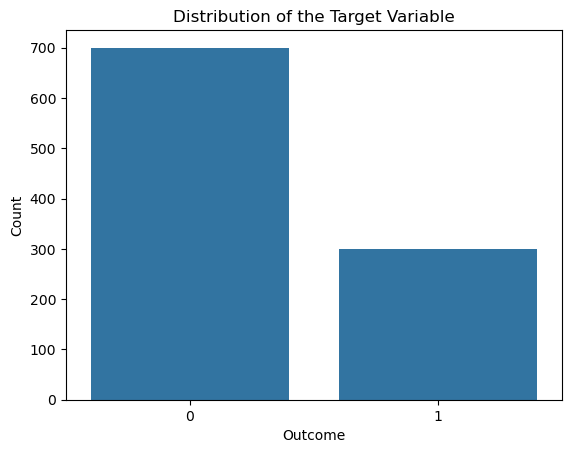

In [45]:
# 2.6. Check if the dataset is balanced or imbalanced
# Use the Target Variable " Default"
# 1 = Diabetes and 0 = Non- Diabetes

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='DEFAULT', data=df)
plt.title("Distribution of the Target Variable")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

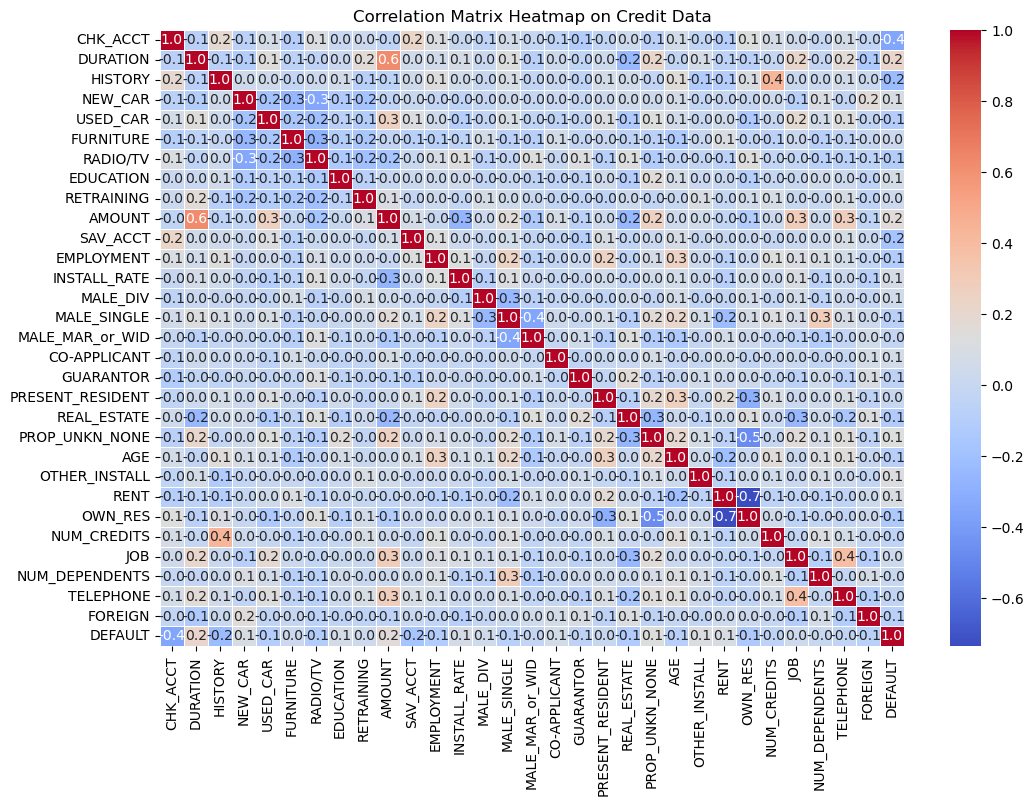

In [52]:
# 2.7. Identify the relationship of numerical variables using the Correlation Matrix
import numpy as np

corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap on Credit Data")
plt.show()

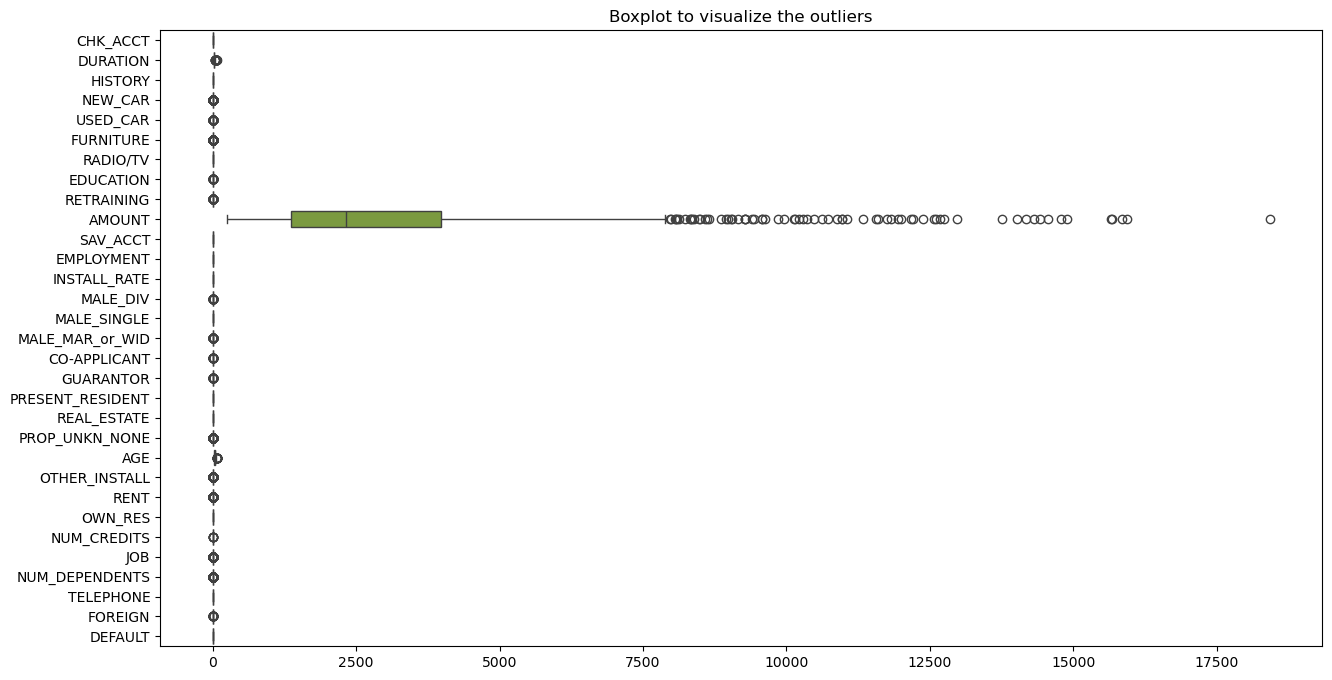

In [53]:
#2.8. Identify Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient="h")
plt.title('Boxplot to visualize the outliers')
plt.show()

In [55]:
### Step 3: Data Preprocessing and Feature Engineering

from sklearn.preprocessing import StandardScaler

#3.1. Standardize the datasets as the variables are not on the same scale.
scaler = StandardScaler()
scaled_features = ['AGE', 'AMOUNT']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


In [64]:
### Step 4: Data Modeling
import numpy as np
from sklearn.model_selection import train_test_split

# 4.1. Partitioning Data into Training and Test Datasets
x = df.drop(columns = ['DEFAULT'])
y = df['DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print(f"Training Sample:{x_train.shape[0]},Testing Sample:{x_test.shape[0]}")

Training Sample:600,Testing Sample:400


In [65]:
# 4.2. Check if the training datasets have the same number of rows ( Predictor variables vs Target variable)
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (600, 30)
y_train shape: (600,)


In [66]:
# 4.2. Train the Logistic Regression Model on the Training Datasets
from sklearn.linear_model import LogisticRegression

CreditRisk_Model = LogisticRegression()
CreditRisk_Model.fit(x_train, y_train)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
# 4.3. Make the prediction on the Test datasets

CreditRisk_pred= CreditRisk_Model.predict(x_test)

In [69]:
### Step 5. Assess the performance of the Logistic Regression Model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

#5.1. Determine the Accuracy Rate, Sensitivity, and Specificity from the Confusion Matrix

accuracy = accuracy_score(y_test,CreditRisk_pred)
cm = confusion_matrix(y_test, CreditRisk_pred)
report = classification_report(y_test, CreditRisk_pred)

print(f"Accuracy Rate:{accuracy:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy Rate:0.78
Confusion Matrix:
 [[258  24]
 [ 66  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       282
           1       0.68      0.44      0.54       118

    accuracy                           0.78       400
   macro avg       0.74      0.68      0.69       400
weighted avg       0.76      0.78      0.76       400



In [ ]:
### Step 6: Interpretation of the Results from the Model Performance

# 6.1. The logistic Regression Model has been built to determine the likelihood of predicting a bad credit application (Defaulted on a Loan).
# The entire dataset was used in this model ( 30 predictor variables vs 1 Target Variable)
# Based on the model performance and the values of Recall/ Sensitivity, Logistic Regression is not perfect for predicting the important/positive class which is Defaulted on Loan(Default=1)
# However, the model is performing well when it is about predicting good credit applications (Default variable = 0)

# In conclusion, as a Data Scientist, I could engage in further discussion with the Risk Management Team to proceed with other models like Neural Network
# Or, I could select important variables using PCA - ML algorithms and then run the Logistic Regression model with important variables. 
